In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import operator

In [2]:
# read ratings file

ratings = pd.read_csv('data/ratings.dat',sep='::',engine='python',names=['UserID', 'MovieID', 'Rating', 'Timestamp'])
print (str(len(ratings))+' '+'ratings loaded')
ratings.head()

1000209 ratings loaded


,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [3]:
# read users file

users = pd.read_csv('data/users.dat',sep='::',engine='python',names=['UserID', 'Gender', 'Age', 'Occupation','Zip-code'])
print (str(len(users))+' '+'users loaded')
users.head()

6040 users loaded


,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [4]:
# read movies file

movies = pd.read_csv('data/movies.dat',sep='::',engine='python',names=['MovieID', 'Title', 'Genres'])
print (str(len(movies))+' '+'movies loaded')
movies.head()

3883 movies loaded


,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
# explore ratings data

ratings['Rating'].describe()

count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: Rating, dtype: float64

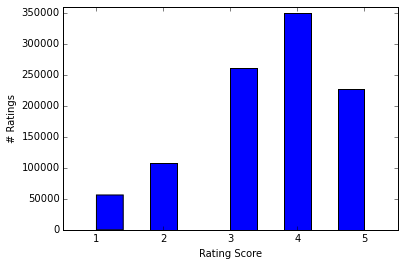

In [6]:
# see the distribution of  rating values
plt.hist(ratings['Rating'])
plt.xlim(0.5,5.5)
plt.ylim(0,360000)
plt.xlabel('Rating Score')
plt.ylabel('# Ratings')

In [7]:
# mean rating is 3.58 and it seems that half the movies have a rating of 4 and 5.

# now let's explore the genres of the films
# find the 
genre_dict={}
for s in movies['Genres'].str.split('|').values:
    
    for i in range(0,len(s)):
        if s[i] in genre_dict:
            genre_dict[s[i]] += 1
        else:
            genre_dict[s[i]] = 1 

number_of_genres=len(list(genre_dict.keys()))
print('There are '+ str(number_of_genres)+ ' film genres: '+str(list(genre_dict.keys()))+'\n')
print('Top 5 genres are: '+str(dict(sorted(genre_dict.items(), key=operator.itemgetter(1), reverse=True)[:5])))
    

There are 18 film genres: ['Fantasy', "Children's", 'Crime', 'Musical', 'Animation', 'Comedy', 'Drama', 'Action', 'Romance', 'Mystery', 'Thriller', 'War', 'Adventure', 'Horror', 'Film-Noir', 'Sci-Fi', 'Documentary', 'Western']

Top 5 genres are: {'Comedy': 1200, 'Drama': 1603, 'Romance': 471, 'Thriller': 492, 'Action': 503}


In [17]:
# here we will use a matrix factorization technique (specifically 
# Singular Value Decomposition (SVD)) which
# is usually more effective because it allows to discover the latent features underlying
# the interactions between users and items (here movies)

# Our task is to find two matrices such that their product approximates R (R ~ P*Q^T)
# and K latent features. Each row of P represents how users and the features are associated
# and each row of Q represents how items and features are associated. Then each rating can
# be predicted as described in:
# Ruslan Salakhutdinov and Andriy Mnih. Probabilistic matrix factorization.
# 2008. URL: http://papers.nips.cc/paper/3208-probabilistic-matrix-factorization.pdf.

# The Surprise library provides the SVD algorithm as well as 
# functions to evaluate the algorithm

# Import libraries from Surprise package
from surprise import Reader, Dataset,SVD
from surprise.model_selection import cross_validate

# load data using Dataset class from the pandas dataframe 
reader = Reader()
data = Dataset.load_from_df(ratings[['UserID', 'MovieID', 'Rating']], reader)



In [21]:
# split the data into 10 folds. The data are trained 10 times each time on 9 different
# folds and the result will be reported on the 10th fold.
# use svd algorithm and compute the RMSE error and MAE errors
svd=SVD()
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=10, verbose=True)


Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8657  0.8669  0.8670  0.8649  0.8673  0.8664  0.8672  0.8658  0.8647  0.8644  0.8660  0.0010  
MAE (testset)     0.6789  0.6795  0.6799  0.6778  0.6795  0.6793  0.6806  0.6798  0.6787  0.6773  0.6791  0.0009  
Fit time          80.75   78.22   80.09   74.13   73.20   77.51   81.59   80.00   73.81   72.44   77.18   3.30    
Test time         2.39    1.68    1.54    1.52    1.66    1.53    2.18    1.64    1.49    1.52    1.72    0.30    


{'fit_time': (80.75492310523987,
  78.21712112426758,
  80.08910012245178,
  74.12587189674377,
  73.20004081726074,
  77.51405310630798,
  81.59419798851013,
  80.00344014167786,
  73.81223201751709,
  72.4431619644165),
 'test_mae': array([0.67887027, 0.67953014, 0.67988694, 0.67776494, 0.67945341,
        0.67926691, 0.68059795, 0.67977572, 0.67866169, 0.67732661]),
 'test_rmse': array([0.86571091, 0.86685804, 0.866971  , 0.86489492, 0.8673489 ,
        0.86636959, 0.86717413, 0.86575584, 0.86466824, 0.86439898]),
 'test_time': (2.388460874557495,
  1.6773769855499268,
  1.5415599346160889,
  1.5207979679107666,
  1.6585187911987305,
  1.5325901508331299,
  2.183187961578369,
  1.637700080871582,
  1.4890999794006348,
  1.522684097290039)}

In [22]:
# get a part of the data to use as a trainset and run SVD
trainset = data.build_full_trainset()
svd.fit(trainset)

In [41]:
# in order to predict a rating from a user let us select
# a user and see their ratings, e.g., user 1000

ratings[ratings['UserID'] == 1000]


,UserID,MovieID,Rating,Timestamp
155093,1000,2987,4,975041859
155094,1000,2990,4,975040566
155095,1000,3793,4,975041397
155096,1000,588,4,975041859
155097,1000,589,5,975040919
155098,1000,1,5,975041651
155099,1000,592,4,975041494
155100,1000,594,3,975041859
155101,1000,595,5,975041752
155102,1000,596,4,975041859


In [42]:
# now we can predict user's rating for a movie 
# e.g., movie 1240 which he/she actually gave a score of 4

svd.predict(1000, 1240, 4)

Prediction(uid=1000, iid=1240, r_ui=4, est=4.269383178727647, details={'was_impossible': False})

In [43]:
# we see that the predicted rating is 4.2 compared to the actual rating which is 4